## Membaca Data

In [1]:
#import modules
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from scipy.stats import gaussian_kde

In [2]:
dframe=pd.read_csv('HR_comma_sep.csv', delimiter=";")

In [3]:
dframe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Fungsi deskripsikan () di panda berguna untuk mendapatkan berbagai statistik ringkasan. Fungsi ini mengembalikan jumlah, rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuantil data.

In [4]:
dframe.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
dframe.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

## Preprocesing ##

Disini, kita perlu mengalisis variable dataset yang kita gunakan. Dalam penelitian ini variabel left akan dihapus karena variabel ini adalah target data sedangkan penelitian ini adalah clustering.

In [7]:
# get the start time
st = time.time()

## Konversi

In [8]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dframe['Departments']=le.fit_transform(dframe['Departments'])
dframe['salary']=le.fit_transform(dframe['salary'])

## Korelasi Data

In [9]:
corr = dframe.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Departments,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


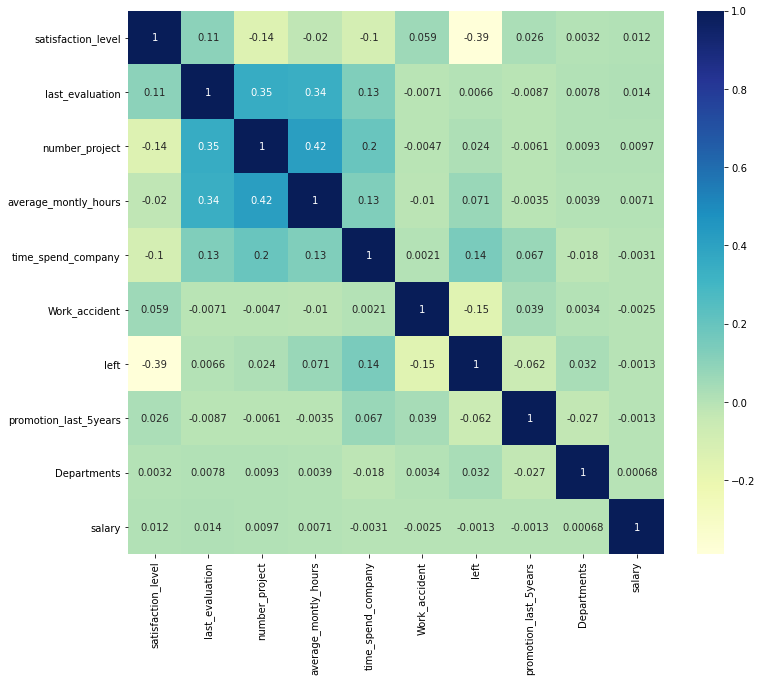

In [10]:
myplt = plt.figure(figsize=(12,10))
sns.heatmap(dframe.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Menghapus Kolom Target

In [11]:
## Mengahpus colomn yang tidak ada korelasi
#dframe.drop(columns='satisfaction_level',inplace=True)
dframe.drop(columns='left', inplace=True)
dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


## Standardize dan Normalize

In [12]:
# standardize data using 
# Feature scaling using StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(dframe)

# create new dataframe from standardized data
standardized_df = pd.DataFrame(standardized_data, columns=dframe.columns)
norm_dframe = normalize(standardized_df)

In [13]:
new_dframe = pd.DataFrame(data=norm_dframe, columns=['satisfaction_level','last_evaluation','number_project',
                                                     'average_montly_hours','time_spend_company','Work_accident',
                                                     'promotion_last_5years','Departments','salary'])
new_dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,-0.390634,-0.453529,-0.610195,-0.367920,-0.142337,-0.171507,-0.061489,0.164232,-0.231485
1,0.264912,0.295841,0.341731,0.429462,0.602951,-0.144687,-0.051874,0.138550,0.367029
2,-0.516973,0.244764,0.663001,0.363139,0.087843,-0.105099,-0.037680,0.100641,0.266606
3,0.219903,0.458707,0.495430,0.224223,0.524731,-0.209763,-0.075205,0.200866,-0.283120
4,-0.402594,-0.472248,-0.602980,-0.347063,-0.140654,-0.169479,-0.060762,0.162290,-0.228748
...,...,...,...,...,...,...,...,...,...
14994,-0.356317,-0.355289,-0.608893,-0.417141,-0.142034,-0.171141,-0.061358,0.308977,-0.230991
14995,-0.373497,-0.527481,-0.559399,-0.314321,-0.130488,-0.157230,-0.056370,0.283862,-0.212215
14996,-0.374734,-0.417152,-0.561253,-0.445963,-0.130921,-0.157751,-0.056557,0.284803,-0.212918
14997,-0.561693,0.395742,0.495027,0.439040,0.095442,-0.114191,-0.040940,0.206160,-0.154125


## Clustering

## Evaluasi K (jumlah cluster) terbaik

## 1. ELbow

In [14]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}
k_range = range(1,8)
sse = []
for i in k_range:
    kmeans = KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit_transform(new_dframe)
    sse.append(kmeans.inertia_)

Elbow point is at 3 clusters


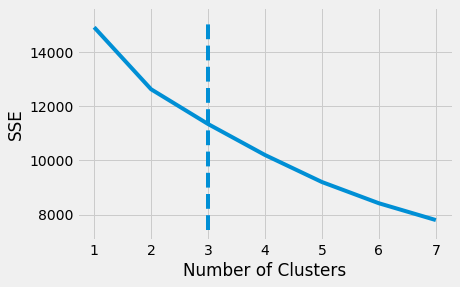

In [15]:
kl = KneeLocator(
    range(1,8),sse, curve='convex', direction='decreasing'
)

print(f"Elbow point is at {kl.elbow:.0f} clusters")

plt.style.use("fivethirtyeight")
plt.plot(range(1,8), sse)
plt.xticks(range(1,8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


## Metode Silhouette Score  (Internal)

For n_clusters = 2, the silhouette score is 0.5541
For n_clusters = 3, the silhouette score is 0.5674
For n_clusters = 4, the silhouette score is 0.4362
For n_clusters = 5, the silhouette score is 0.4003
For n_clusters = 6, the silhouette score is 0.3557
For n_clusters = 7, the silhouette score is 0.3388

The best k value is 3 with a silhouette score of 0.5674


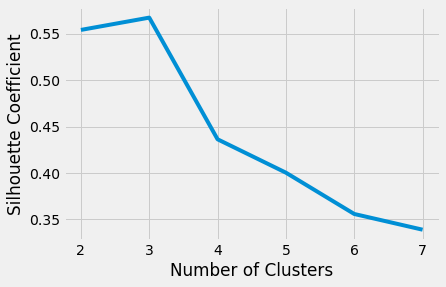

In [16]:
k_range = range(2, 8)
silhouette_coefficients = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    data = kmeans.fit_transform(new_dframe)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    print(f"For n_clusters = {k}, the silhouette score is {score:.4f}")
    
best_k = k_range[np.argmax(silhouette_coefficients)]
best_score = max(silhouette_coefficients)
print(f"\nThe best k value is {best_k} with a silhouette score of {best_score:.4f}")

plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

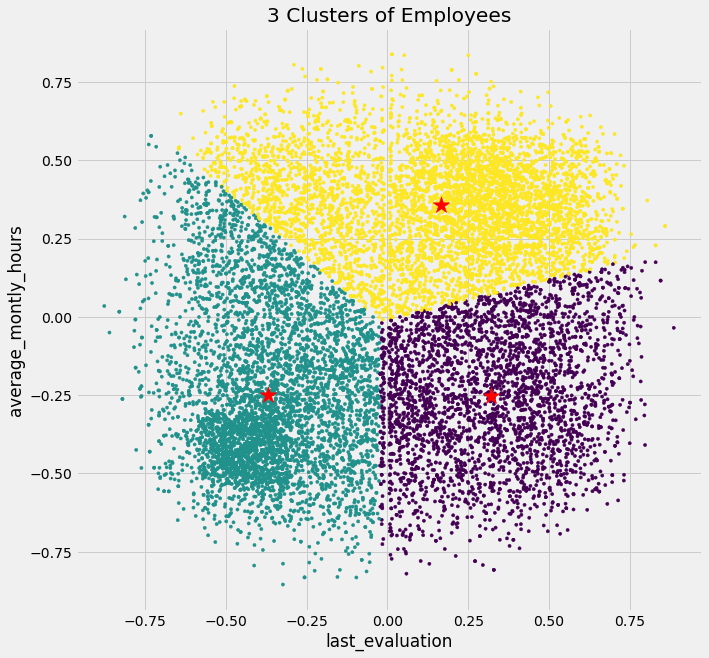

In [17]:
left_emp = new_dframe[['last_evaluation', 'average_montly_hours']]
kmeans = KMeans(n_clusters=3).fit(left_emp)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
new_dframe['cluster'] = labels
plt.figure(figsize=(10,10))
plt.scatter(left_emp.iloc[:, 0], left_emp.iloc[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='center')
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
#plt.ylabel('number_project')
plt.title('3 Clusters of Employees')
plt.show()

In [18]:
centroids = kmeans.cluster_centers_
density = np.zeros(3)
for i in range(3):
    cluster_data = left_emp[new_dframe['cluster'] == i]
    kde = gaussian_kde(cluster_data.T)
    density[i] = kde(centroids[i])

for i in range(3):
    print(f'Density of centroid {i+1}: {density[i]}')

Density of centroid 1: 2.5120326739043994
Density of centroid 2: 2.7831062741178596
Density of centroid 3: 2.6989728128824533


## Cluster yang paling optimal


In [19]:
kmean = KMeans(n_clusters=3)
y_cluster = kmean.fit_predict(new_dframe)
new_dframe['Cluster']=y_cluster
new_dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,cluster,Cluster
0,-0.390634,-0.453529,-0.610195,-0.367920,-0.142337,-0.171507,-0.061489,0.164232,-0.231485,1,1
1,0.264912,0.295841,0.341731,0.429462,0.602951,-0.144687,-0.051874,0.138550,0.367029,2,2
2,-0.516973,0.244764,0.663001,0.363139,0.087843,-0.105099,-0.037680,0.100641,0.266606,2,2
3,0.219903,0.458707,0.495430,0.224223,0.524731,-0.209763,-0.075205,0.200866,-0.283120,2,2
4,-0.402594,-0.472248,-0.602980,-0.347063,-0.140654,-0.169479,-0.060762,0.162290,-0.228748,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.356317,-0.355289,-0.608893,-0.417141,-0.142034,-0.171141,-0.061358,0.308977,-0.230991,1,1
14995,-0.373497,-0.527481,-0.559399,-0.314321,-0.130488,-0.157230,-0.056370,0.283862,-0.212215,1,1
14996,-0.374734,-0.417152,-0.561253,-0.445963,-0.130921,-0.157751,-0.056557,0.284803,-0.212918,1,1
14997,-0.561693,0.395742,0.495027,0.439040,0.095442,-0.114191,-0.040940,0.206160,-0.154125,2,2


In [20]:
kmean.cluster_centers_

array([[ 1.08584427e-01,  3.21824643e-01, -8.18919016e-03,
        -2.50701862e-01, -6.37053999e-02, -3.21458132e-02,
        -3.92121004e-02,  1.24171453e-02,  1.33511160e-02,
         3.39728246e-14],
       [-3.55421444e-02, -3.69351187e-01, -1.63270869e-01,
        -2.51633786e-01, -8.96164437e-02, -4.83927446e-02,
        -3.92365490e-02,  2.82762267e-02,  3.95291401e-03,
         1.00000000e+00],
       [ 3.60857197e-02,  1.64585945e-01,  1.18236136e-01,
         3.58109847e-01,  2.50904603e-02, -4.30757620e-02,
        -3.45036136e-02,  2.35962126e-02,  3.33141677e-03,
         2.00000000e+00]])

In [21]:
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 129.6157464981079 seconds


# Membuat Dataset baru dengan label cluster

In [22]:
new_dframe['Cluster']=new_dframe['Cluster'].replace([0,1,2],['UnResign','Ragu-ragu','Resign'])

In [23]:
new_dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,cluster,Cluster
0,-0.390634,-0.453529,-0.610195,-0.367920,-0.142337,-0.171507,-0.061489,0.164232,-0.231485,1,Ragu-ragu
1,0.264912,0.295841,0.341731,0.429462,0.602951,-0.144687,-0.051874,0.138550,0.367029,2,Resign
2,-0.516973,0.244764,0.663001,0.363139,0.087843,-0.105099,-0.037680,0.100641,0.266606,2,Resign
3,0.219903,0.458707,0.495430,0.224223,0.524731,-0.209763,-0.075205,0.200866,-0.283120,2,Resign
4,-0.402594,-0.472248,-0.602980,-0.347063,-0.140654,-0.169479,-0.060762,0.162290,-0.228748,1,Ragu-ragu
...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.356317,-0.355289,-0.608893,-0.417141,-0.142034,-0.171141,-0.061358,0.308977,-0.230991,1,Ragu-ragu
14995,-0.373497,-0.527481,-0.559399,-0.314321,-0.130488,-0.157230,-0.056370,0.283862,-0.212215,1,Ragu-ragu
14996,-0.374734,-0.417152,-0.561253,-0.445963,-0.130921,-0.157751,-0.056557,0.284803,-0.212918,1,Ragu-ragu
14997,-0.561693,0.395742,0.495027,0.439040,0.095442,-0.114191,-0.040940,0.206160,-0.154125,2,Resign


In [24]:
pd.DataFrame(new_dframe).to_csv("kmeans.csv")